<a href="https://colab.research.google.com/github/Debora-Ibarra/Repositorio-EDP-1/blob/main/Sturm_Series_Generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sturm Liouville

Se busca resolver

\begin{align*}
    f''(x) + 2f'(x) + \lambda f(x) &= 0, \quad 0 < x < 1 \\
    f(0) &= 0, \quad f(1) = 0
\end{align*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, exp

Una vez resuelto el problema tenemos:

In [2]:
p = lambda x: np.exp(2 * x)
q = lambda x: 0
sigma = lambda x: np.exp(2 * x)

print("Problema de Sturm–Liouville:")
print("p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) continua")
print("⇒ Es un problema de Sturm–Liouville regular\n")


Problema de Sturm–Liouville:
p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) continua
⇒ Es un problema de Sturm–Liouville regular



EigenValores y Eigenfunciones

In [3]:
def eigenvalue(n):
    return n*2 * pi*2 + 1
def eigenfunction(n, x):
    return np.exp(-x) * np.sin(n * pi * x)

Definimos nuestra función a expandir

In [4]:
def u(x):
    return np.exp(-x)

Ahora con la fórmula para los coeficientes tenemos:

In [5]:
def coef_cn(n):
    num = quad(lambda x: u(x) * eigenfunction(n, x) * np.exp(2 * x), 0, 1)[0]
    den = quad(lambda x: eigenfunction(n, x)**2 * np.exp(2 * x), 0, 1)[0]
    return num / den

Construimos nuestra serie

In [9]:
N = 5
x_vals = np.linspace(0, 1, 500)
u_exact = u(x_vals)
u_approx = np.zeros_like(x_vals)
coef_list = []

for n in range(1, N + 1):
    if n % 2 == 0:
        continue
    cn = coef_cn(n)
    u_approx += cn * eigenfunction(n, x_vals)
    coef_list.append((n, cn))

Imprimimos nuestros coeficientes

In [10]:
print("Coeficientes c_n (solo n impares):")
for n, cn in coef_list:
    print(f"n = {n}, c_n = {cn:.6f}")


Coeficientes c_n (solo n impares):
n = 1, c_n = 1.273240
n = 3, c_n = 0.424413
n = 5, c_n = 0.254648


Graficando

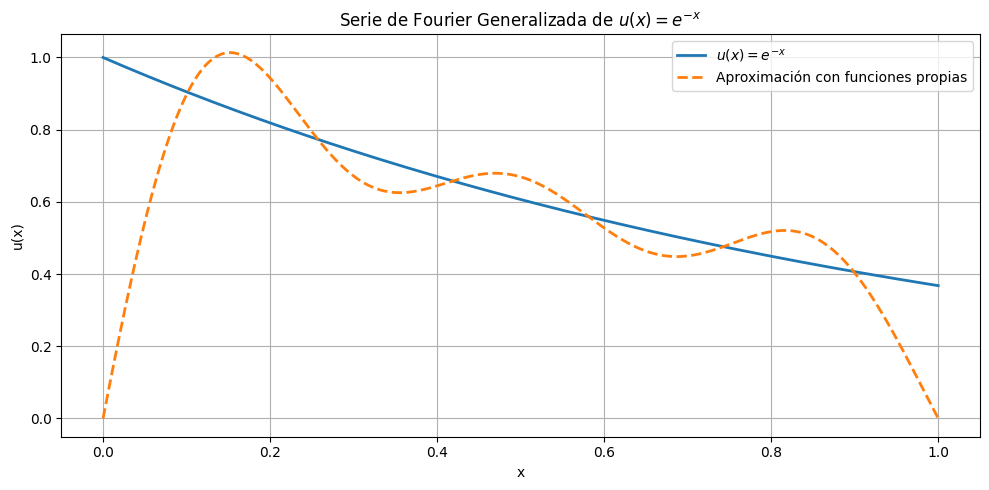

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(x_vals, u_exact, label=r'$u(x) = e^{-x}$', lw=2)
plt.plot(x_vals, u_approx, '--', label='Aproximación con funciones propias', lw=2)
plt.title('Serie de Fourier Generalizada de $u(x) = e^{-x}$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()